In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
from glob import glob
#import seaborn as sns
from scipy import stats
import matplotlib.mlab as mlab
#sns.set()
from astropy.wcs import WCS
from photutils import aperture_photometry,CircularAperture,CircularAnnulus
from astropy.stats import mad_std
from photutils import DAOStarFinder
from astropy.stats import sigma_clipped_stats
import photutils
import bottleneck
#photutils.test()

<h1> Part One (Master Bias & Master Flat) 

In [65]:
bias_files = glob('m91/bias/b130311*')

bias_data = []
for file in bias_files:
    image = fits.open(file)
    bias_data.append(image[0].data)
    
masterbias = np.average(bias_data,axis = 0)
newheader = fits.PrimaryHDU(masterbias)
#newheader.writeto('mb.fits',overwrite = True)

In [66]:
bias1 = fits.open('m91/bias/b130311_0001.fits')
mbias = fits.open('mb.fits')

# print(bias1[0].data)
# print(mbias[0].data)

In [67]:
flatb_files = glob('m91/flats/b/f130311*')
flatb_files = glob('M91/flats/B/F130311*') 
flatb_data = [] 
for file in flatb_files: 
    image=fits.open(file) 
    data = image[0].data 
    bias_sub = data - mbias[0].data 
    flatb_data.append(bias_sub) 

masterflatb = np.average(flatb_data,axis=0)

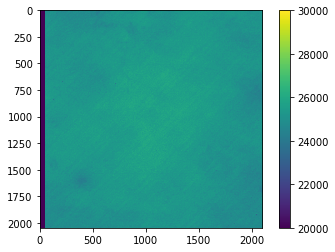

In [68]:
# print(masterflatb)
plt.imshow(masterflatb,vmin=20000,vmax=30000)
plt.colorbar()

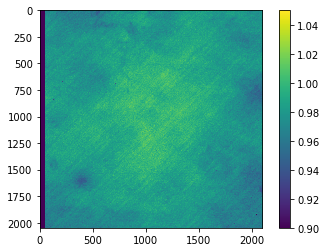

In [69]:
nmasterflatb = masterflatb/((masterflatb[750:1000,750:1000]).mean()) 
plt.imshow(nmasterflatb,vmin=0.9,vmax=1.05) 
plt.colorbar()

<h1> Part Two Filters


C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


27.41449187412603


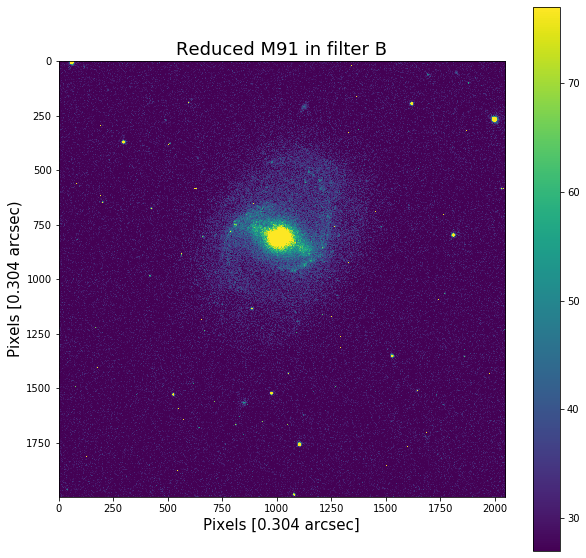

In [70]:
objectb_files = glob('m91/object/B/O*')

objectb_data = [] 
for file in objectb_files: 
    image=fits.open(file) 
    objectb_data.append(image[0].data) 

objectb = np.average(objectb_data,axis=0) 
correctedb = ((objectb-masterbias)/nmasterflatb) 
correctedb = correctedb[50:,50:]

# print(correctedb) 
print(np.mean(correctedb))

plt.figure(figsize=[10,10])
plt.imshow(correctedb,vmin=27,vmax=77) 
plt.colorbar() 
plt.title('Reduced M91 in filter B',fontsize=18) 
plt.xlabel('Pixels [0.304 arcsec]',fontsize =15) 
plt.ylabel('Pixels [0.304 arcsec)',fontsize =15) 
plt.savefig('B_filter.jpg')

C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


208.03838503653262


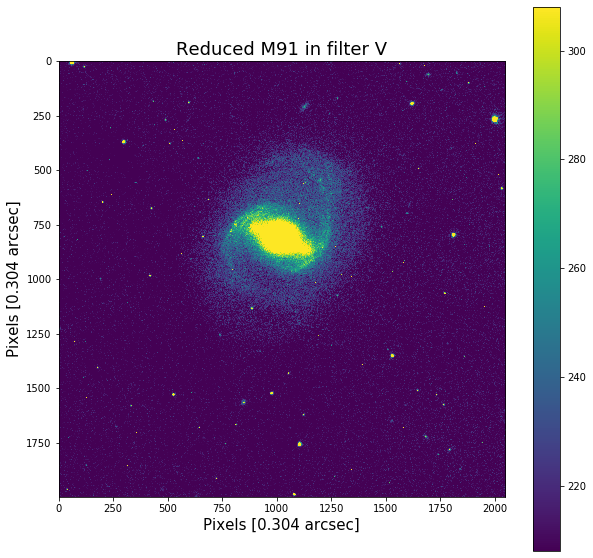

In [71]:
flatv_files = glob('M91/flats/V/F130311*')

flatv_data = [] 
for file in flatv_files: 
    image=fits.open(file) 
    data = image[0].data 
    bias_sub = data - mbias[0].data 
    flatv_data.append(bias_sub) 

masterflatv = np.average(flatv_data,axis=0)
nmasterflatv = masterflatv/((masterflatv[750:1000,750:1000]).mean())
objectv_files = glob('m91/object/V/O*')

objectv_data = []
for file in objectv_files:
    image=fits.open(file) 
    objectv_data.append(image[0].data)

objectv = np.average(objectv_data,axis=0) 
correctedv = ((objectv-masterbias)/nmasterflatv) 
correctedv = correctedv[50:,50:]

# print(correctedv)
print(np.mean(correctedv))

plt.figure(figsize=[10,10]) 
plt.imshow(correctedv,vmin=208,vmax=308) 
plt.colorbar() 
plt.title('Reduced M91 in filter V',fontsize=18) 
plt.xlabel('Pixels [0.304 arcsec]',fontsize =15) 
plt.ylabel('Pixels [0.304 arcsec]',fontsize =15) 
plt.savefig('V_filter.jpg')

C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


20.758293334747528


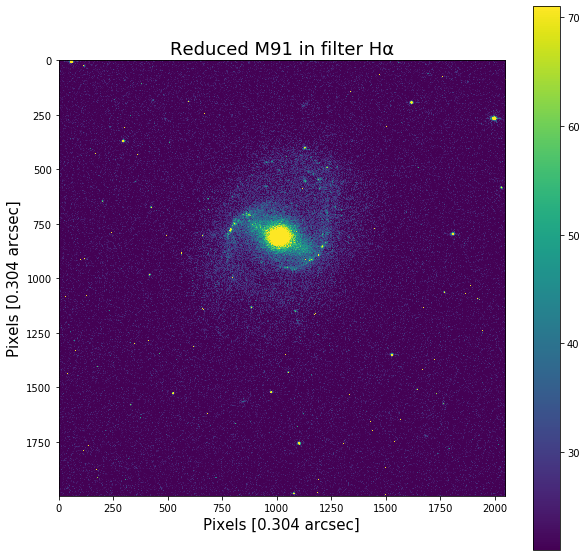

In [72]:
flath_files = glob('M91/flats/Halpha_NII/F130311*') 

flath_data = []
for file in flath_files:
    image=fits.open(file) 
    data = image[0].data 
    bias_sub = data - mbias[0].data 
    flath_data.append(bias_sub) 
    masterflath = np.average(flath_data,axis=0)

nmasterflath = masterflath/((masterflath[750:1000,750:1000]).mean())

objecth_files = glob('m91/object/Halpha_NII/O*')

objecth_data = []
for file in objecth_files: 
    image=fits.open(file) 
    objecth_data.append(image[0].data) 
    
objecth = np.average(objecth_data,axis=0) 
correctedh = ((objecth-masterbias)/nmasterflath) 
correctedh = correctedh[50:,50:]

#print(correctedh)
print(np.mean(correctedh))

plt.figure(figsize=[10,10]) 
plt.imshow(correctedh,vmin=21,vmax=71)
plt.colorbar() 
plt.title('Reduced M91 in filter H\u03B1',fontsize=18)
plt.xlabel('Pixels [0.304 arcsec]',fontsize =15) 
plt.ylabel('Pixels [0.304 arcsec]',fontsize =15) 
plt.savefig('H_filter.jpg')


<h1> Part Three (combined stuff)


443.9977923887427


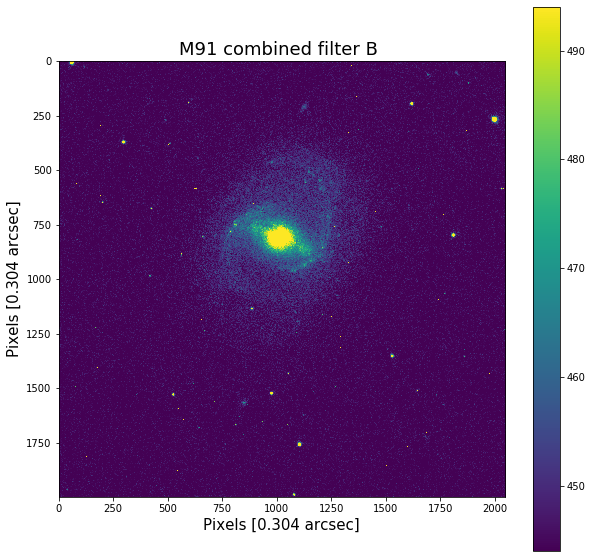

In [73]:
objectb = objectb[50:,50:] 
plt.figure(figsize=[10,10]) 
plt.imshow(objectb,vmin=444,vmax=494) 
plt.colorbar() 

#print(objectb)
print(np.mean(objectb))

plt.title('M91 combined filter B ',fontsize=18) 
plt.xlabel('Pixels [0.304 arcsec]',fontsize =15) 
plt.ylabel('Pixels [0.304 arcsec]',fontsize =15) 
plt.savefig('combb.jpg')

621.6586422848626


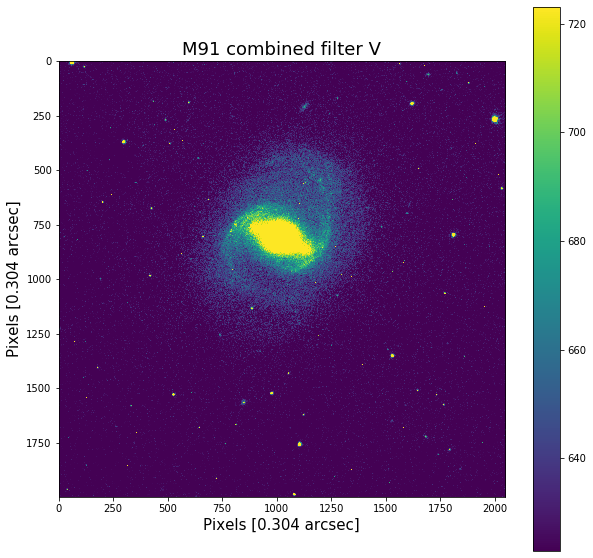

In [74]:
objectv = objectv[50:,50:] 
plt.figure(figsize=[10,10]) 
plt.imshow(objectv,vmin=623,vmax=723) 
plt.colorbar()

#print(objectv)
print(np.mean(objectv))

plt.title('M91 combined filter V',fontsize=18) 
plt.xlabel('Pixels [0.304 arcsec]',fontsize =15) 
plt.ylabel('Pixels [0.304 arcsec]',fontsize =15) 
plt.savefig('combv.jpg')

437.43817755744027


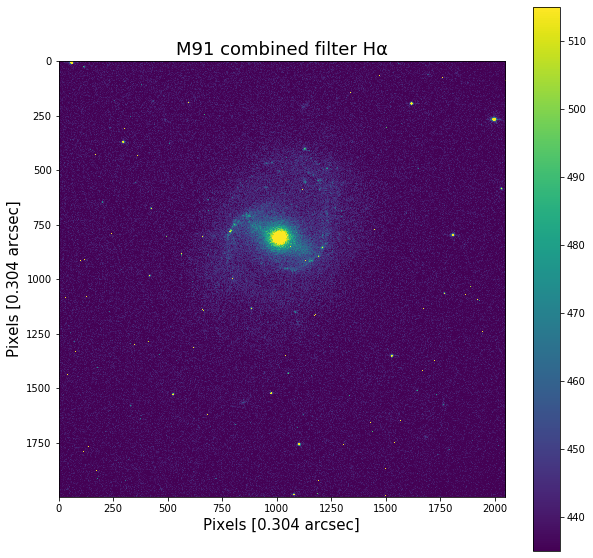

In [75]:
objecth = objecth[50:,50:] 
plt.figure(figsize=[10,10]) 
plt.imshow(objecth,vmin=435,vmax=515) 
plt.colorbar()

#print(objecth)
print(np.mean(objecth))

plt.title('M91 combined filter H\u03B1',fontsize=18) 
plt.xlabel('Pixels [0.304 arcsec]',fontsize =15) 
plt.ylabel('Pixels [0.304 arcsec]',fontsize =15) 
plt.savefig('combh.jpg')

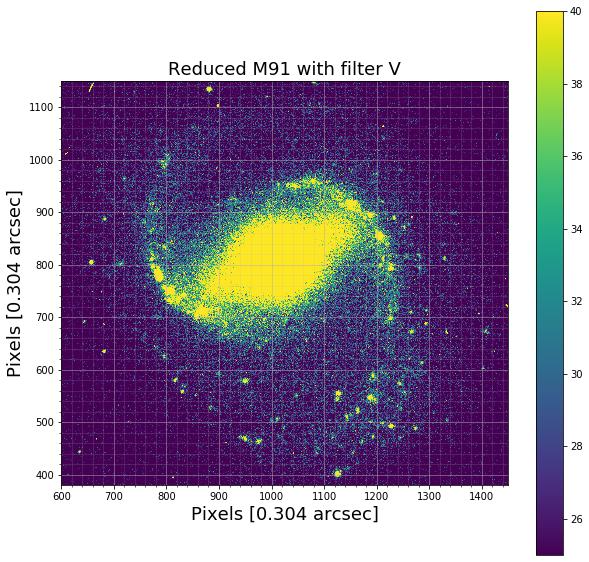

In [76]:
plt.figure(figsize=[10,10]) 
plt.imshow(correctedh,vmin=25,vmax=40) 
plt.colorbar() 
plt.title('Reduced M91 with filter V',fontsize=18) 

plt.xlabel('Pixels [0.304 arcsec]', fontsize = 18)
plt.xlim([600,1450])

plt.ylabel('Pixels [0.304 arcsec]', fontsize=18)
plt.ylim([380,1150])

plt.grid(True, which='major', alpha=100) 
plt.minorticks_on() 
plt.grid(True, which='minor', alpha=0.2) 

plt.savefig('gsize.jpg')

__*Examaning the combined picture the galaxy appears to be 850 by 770 pixels. This, following the given ratio of 1 pixel = 0.304 arc equations to 258.4 by 234.08 arcsec<sup>2</sup>*__

In [77]:
x = 258.4
y = 234.0
pi = np.pi
rad = pi/(180)
xrad = x*rad*(1/3600)
yrad = y*rad*(1/3600)
d = 15e6

xkpc = d*xrad*(1/1000)
ykpc = d*xrad*(1/1000)

ps = xkpc*ykpc
ta = ps*np.sin(39*rad)

dx = 20*0.304/258.5
dy = 20*0.304/234.08
dd = 0.8e6/15e6

darea = np.sqrt((dx**2)+(dy**2)+(dd**2))*ps
dta = np.sqrt((dx**2)+(dy**2)+(dd**2))*ta
print(darea)
print(dta)

print('The apparent physical size is equal to {:.2f} \u00B1 {:.2f} kPc'.format(ps,darea))
print('When correcting for inclindation of our line of sight of the galaxy the physical size becomes {:.2f} \u00B1 {:.2f} kPc'.format(ta,dta))


22.533939399715287
14.181067554922162
The apparent physical size is equal to 353.12 ± 22.53 kPc
When correcting for inclindation of our line of sight of the galaxy the physical size becomes 222.22 ± 14.18 kPc


<h1> Part Four (NN Serpentis Bias and Flats)


C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


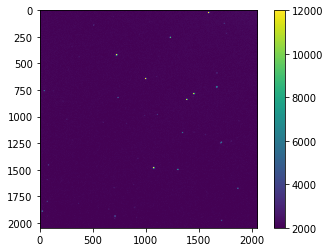

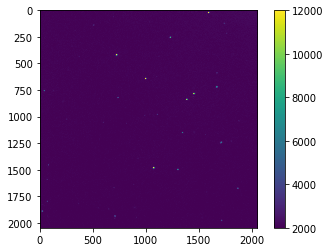

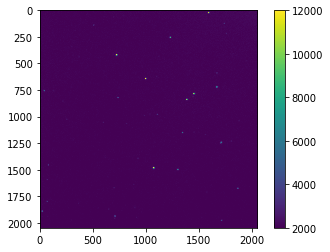

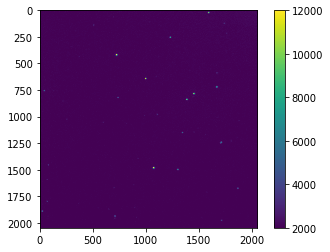

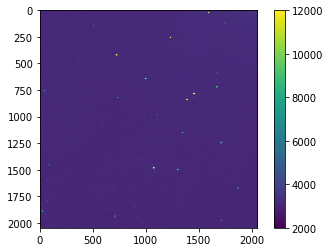

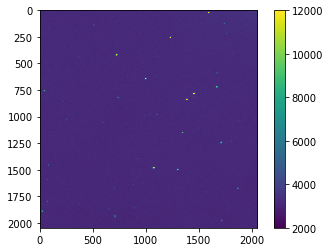

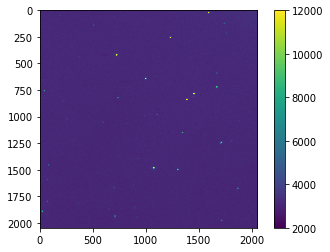

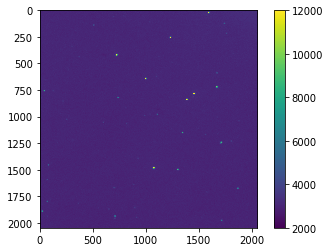

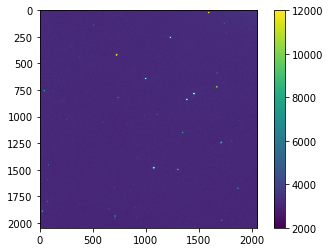

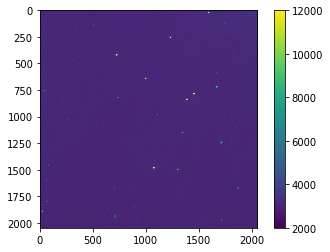

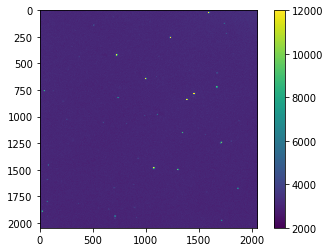

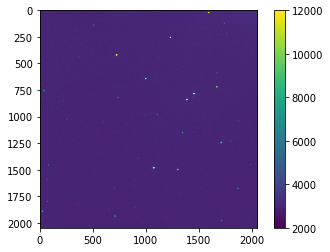

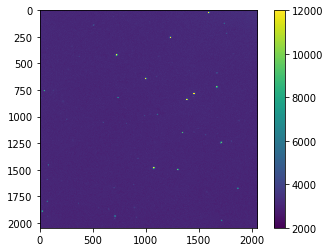

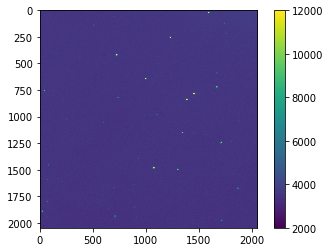

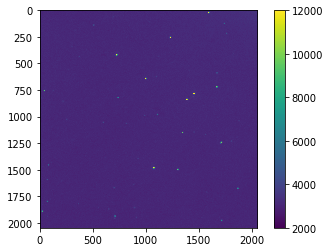

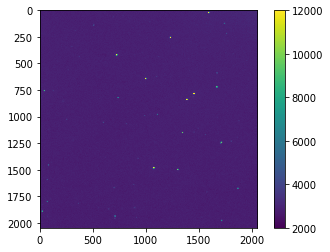

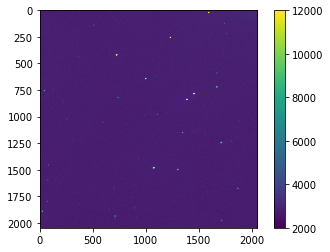

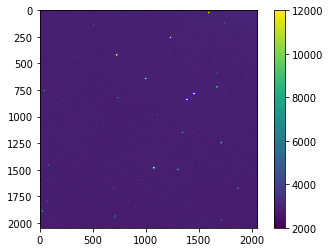

C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


In [78]:
bias_files2 = glob('NNSer/bias/B*')
bias_data2 = [] 
for file in bias_files2: 
    image=fits.open(file) 
    bias_data2.append(image[0].data)

masterbias1 = np.average(bias_data2,axis=0)
flatN_files = glob('NNSer/flats/clear/F*') 
flatN_data = [] 

for file in flatN_files: 
    image=fits.open(file) 
    data = image[0].data 
    bias_sub = data - masterbias1
    flatN_data.append(bias_sub) 
    
masterflatn = np.average(flatN_data,axis=0)
nmasterflatn = masterflatn/((masterflatn[250:500,1250:1500]).mean())
objectN_files = glob('NNSer/object/clear/O*')


objectN_data = [] 
for file in objectN_files: 
    image=fits.open(file)
    objectN_data.append(image[0].data)
    
    
    
filtered=[]
for file in objectN_files:
    image=fits.open(file)
    values=image[0].data
    cobj=(values-masterbias1)/nmasterflatn
    rob=np.delete(cobj,np.s_[0:50],axis=1)
    filtered.append(rob)
    plt.imshow(rob,vmin=2000,vmax=12000)
    plt.colorbar()
    plt.show()
    
objectnnser = np.average(objectN_data,axis=0) 
correctednnser = ((objectnnser-masterbias1)/nmasterflatn) 
correctednnser = correctednnser[50:,50:]
newheader = fits.PrimaryHDU(correctednnser) 
newheader.writeto('CNN.fits',overwrite=True)

2858.097481204667


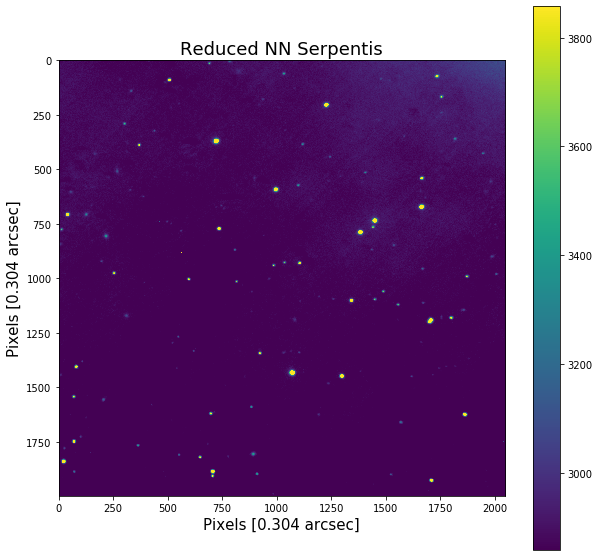

In [79]:
#print(correctedN)
print(np.mean(correctednnser))
plt.figure(figsize=[10,10]) 
plt.imshow(correctednnser,vmin=2858,vmax=3858)
plt.colorbar() 
plt.title('Reduced NN Serpentis',fontsize=18) 
plt.xlabel('Pixels [0.304 arcsec]',fontsize =15) 
plt.ylabel('Pixels [0.304 arcsec]',fontsize =15) 
plt.savefig('nnser.jpg')

<h1> Part Five (Photomerty)

In [108]:
image = fits.open('NNSer/object/clear/O120308_0178.fits')
image = np.abs(image[0].data) 
bkg_sigma = mad_std(image)

daofind = DAOStarFinder(fwhm=6.,threshold=5.*bkg_sigma) 

sources=daofind(image)

sources


<Table length=63>
  id      xcentroid      ...        flux                mag         
int32      float64       ...      float64             float64       
----- ------------------ ... ------------------ --------------------
    1 2094.7991688278694 ... 14.629909111210578   -2.913104070162504
    2 1634.0986804722852 ...  29.48073257234539  -3.6738456779687434
    3  738.2318452120901 ...   1.61856516000821  -0.5228254696683476
    4 1080.3732338810644 ...  1.504660590535495 -0.44359636563633753
    5  1780.148083619018 ...  5.292315994918917  -1.8091144181312924
    6  555.0311389691731 ...  9.082645883119158  -2.3955309552922466
    7  1801.705006804098 ... 2.1810957843119585  -0.8466868458411886
    8 1274.0203904251025 ... 29.597516793222567  -3.6781381891135774
    9 350.42570566295313 ... 1.8240605148527287  -0.6525981058563445
   10 1863.4097246408205 ... 1.0434277955203721 -0.04615600391091203
  ...                ... ...                ...                  ...
   54  695.4579222665756 ...  2.928839760745597  -1.1667390292999098
   55  71.22308756191605 ... 14.283388456536892  -2.8870781189872066
   56 119.36425551379754 ...  1.146789279066688 -0.14870906056416477
   57  754.0870782827344 ...   18.0022197005247   -3.138315143904844
   58   956.800133490988 ... 1.7296711705736163  -0.5949088671005082
   59  752.7375938075879 ... 3.1105846927283403   -1.232105076231635
   60  1754.804559709047 ...  6.618754899038912   -2.051940747264322
   61 2.1270881237401214 ... 2.7537948691181815  -1.0998289660477019
   62  52.20244701032999 ...  14.41479906617831  -2.8970214823918723
   63 2094.8264646641423 ... 15.304749840952773   -2.962065588413636

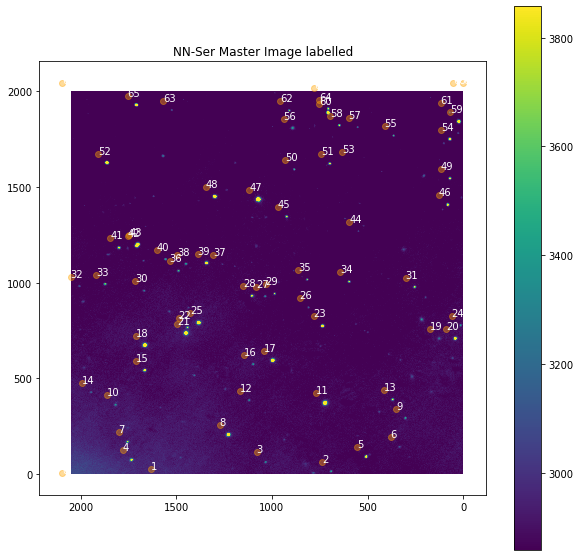

In [96]:
plt.figure(figsize=[10,10])

plt.imshow(correctednnser,vmin=2858,vmax=3858)
plt.colorbar()
plt.scatter(sources['xcentroid'],sources['ycentroid'],alpha=0.4,color='orange')

for i in range(0, len(sources)):
    plt.annotate(i, (sources['xcentroid'][i],sources['ycentroid'][i]), color = 'white')

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title('NN-Ser Master Image labelled')
plt.savefig('nnsermaster.jpg')

#some weird glow, try fix with bias?

In [ ]:
results = [] 
times= [] 
nnsers= [] 
magerr=[]
for file in (objectN_files): 
    image = fits.open(file) 
    time = (image[0].header['UT']) 
    image = image[0].data
    sources=daofind(image)
    
    positions = np.transpose((sources['xcentroid'],sources['ycentroid']))
    aperture = CircularAperture(positions,r=6) 
    annulus_aperture = CircularAnnulus(positions, r_in=10.,r_out=15.) 
    apers = [aperture,annulus_aperture]

    phot_table = aperture_photometry(image, apers)
   
    bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area

    bkg_sum = bkg_mean * aperture.area 

    final_sum = phot_table['aperture_sum_0']-bkg_sum 

    magnitude = -2.5 * np.log10(final_sum)

    #print(magnitude)
    #four chosen zeropoints
    ZA = 15.8 - magnitude[39] 
    ZB = 15.1 - magnitude[48]
    ZC = 13.7 - magnitude[47] 
    ZD = 13.7 - magnitude[25]
    
    #mean zeropoint
    ZP = [ZA, ZB, ZC, ZD]
    
    sigma_clipped_stats(ZP, sigma=5)

    mean_zpt, median_zpt, std_zpt = sigma_clipped_stats (ZP, sigma=5)

    nnser = magnitude[38]+mean_zpt
    
    magerr.append(magnitude[23])
    results.append([time, float(nnser)])
    times.append(time)
    nnsers.append(float(nnser))
    
print(results)

err = (max(magerr) - min(magerr))


In [ ]:
print(results)
err = (max(magerr) - min(magerr))
plt.figure(figsize=[10,10]) 
plt.plot(times,nnsers,'o')
plt.errorbar(times,nnsers,yerr=err,linewidth=1)

plt.xticks(rotation=90) 

plt.gca().invert_xaxis() 
plt.gca().invert_yaxis() 

plt.title('Eclipse of a Binary System',fontsize=18)
plt.xlabel('Time, [Hours:Minutes:Seconds]',fontsize=15) 
plt.ylabel('Magnitude',fontsize=15)
plt.savefig('Lightcurve.jpg')

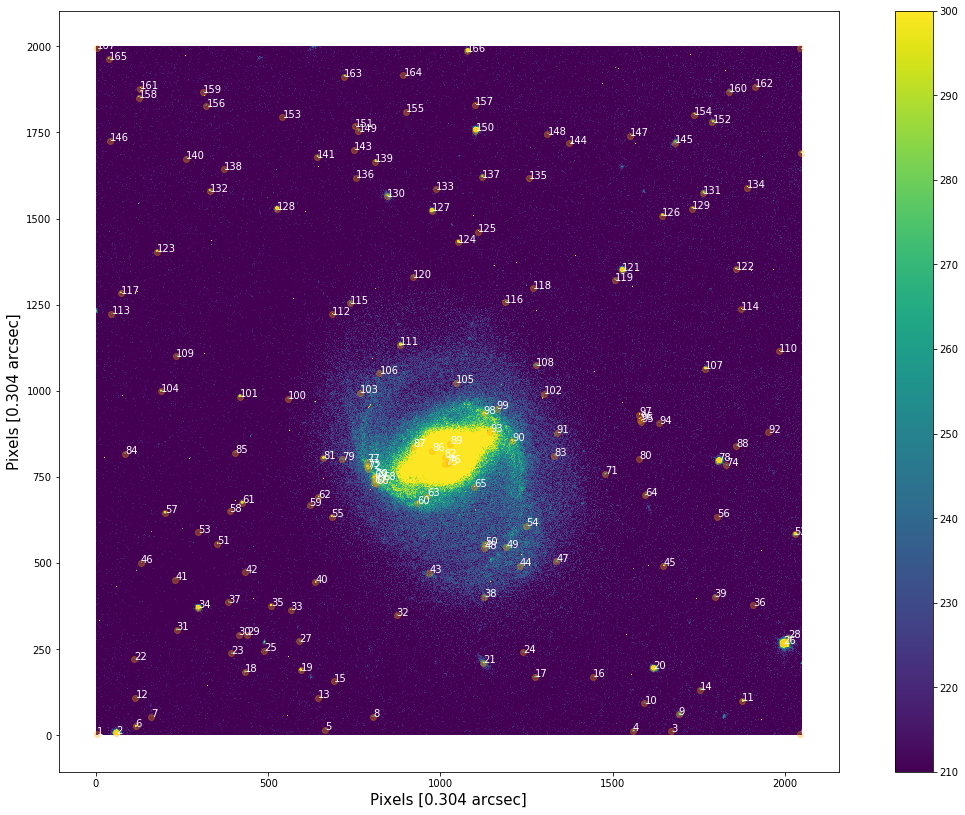

In [110]:
bkg_sigma = mad_std(V)
daofind = DAOStarFinder(fwhm=6.,threshold=5.*bkg_sigma) 
sources=daofind(V)

V = correctedv
plt.figure(figsize=[20,14])
plt.imshow(V,vmin=210,vmax=300) 
plt.colorbar() 
plt.savefig('gfinal.jpg')
plt.scatter(sources['xcentroid'],sources['ycentroid'],alpha=0.3,color='orange',label = sources)
plt.xlabel('Pixels [0.304 arcsec]',fontsize = 15)
plt.ylabel('Pixels [0.304 arcsec]',fontsize = 15)

plt.gca().invert_yaxis() 

#[500:1700,950:1650] 

for i in range(0, len(sources)): 
    plt.annotate(i, (sources['xcentroid'][i], sources['ycentroid'][i]), color='white')


plt.savefig('gphot.jpg')

C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log10
C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log10


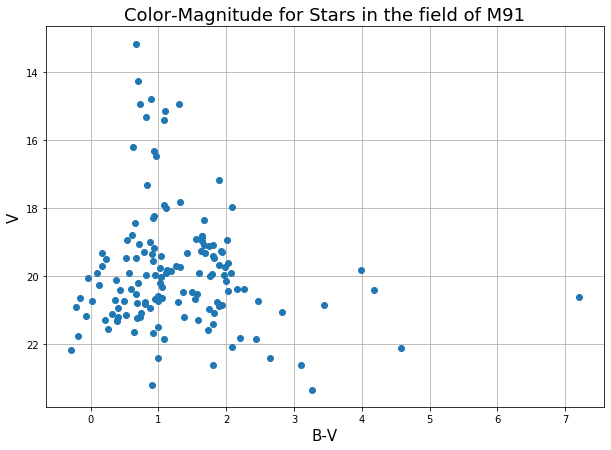

In [105]:
B = correctedb 
V = correctedv

bkg_sigma = mad_std(V)
daofind = DAOStarFinder(fwhm=6.,threshold=5.*bkg_sigma) 
sources=daofind(V)

positions = np.transpose((sources['xcentroid'],sources['ycentroid']))
aperture = CircularAperture(positions,r=6) 
annulus_aperture = CircularAnnulus(positions, r_in=10.,r_out=15.) 
apers = [aperture,annulus_aperture]


phot_table = aperture_photometry(B, apers) 

bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area 

bkg_sum = bkg_mean * aperture.area 

final_sum = phot_table['aperture_sum_0'] - bkg_sum 

magnitude = -2.5*np.log10(final_sum)

phot_table2 = aperture_photometry(V, apers)
bkg_mean2 = phot_table2['aperture_sum_1'] / annulus_aperture.area 
bkg_sum2 = bkg_mean2 * aperture.area 
final_sum2 = phot_table2['aperture_sum_0'] - bkg_sum2 
magnitude2 = -2.5*np.log10(final_sum2)

ZP1 = 15.66 - magnitude[150] 
ZP2 = 15.67 - magnitude[78] 
ZP3 = 16.16 - magnitude[34]

ZP11 = 14.94 - magnitude2[150] 
ZP22 = 14.82 - magnitude2[78] 
ZP33 = 15.29 - magnitude2[34]

ZP2 = np.array([ZP1,ZP2,ZP3]) 
ZP3 = np.array([ZP11,ZP22,ZP33])

mean = np.mean(ZP2) 
mean2 = np.mean(ZP3)

magnitude = magnitude + mean 
magnitude2 = magnitude2 + mean2 

BV = magnitude - magnitude2

plt.figure(figsize=[10,7]) 
plt.plot(BV,magnitude2,'o') 
plt.title('Color-Magnitude for Stars in the field of M91',fontsize=18) 
plt.xlabel('B-V',fontsize=15) 
plt.ylabel('V',fontsize=15)  
plt.gca().invert_yaxis()
plt.savefig('HRM91.jpg')
plt.grid()


__*Please not that in order to get photutils to work, photutils needed to be update to 0.7, resulting in seaborn being over written. As such some figures in the lab report will have different colors than that of the code>*__